In [2]:
# Full setup
import duckdb
import pandas as pd
from sodapy import Socrata
import database_setup.database_setup as dbs
import database_setup.mta_dataset as mta
from dotenv import load_dotenv
import os

load_dotenv()

%reload_ext sql
conn = dbs.get_database_connection(os.getenv('DEV_DATABASE'))
%sql conn --alias duckdb

In [9]:
df = conn.sql('select * from main.fct_station_priority').to_df()

In [10]:
type(df)

pandas.core.frame.DataFrame

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/9c/00484k6j70gfx559yhwszm900000gq/T/ipykernel_65297/2500985577.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


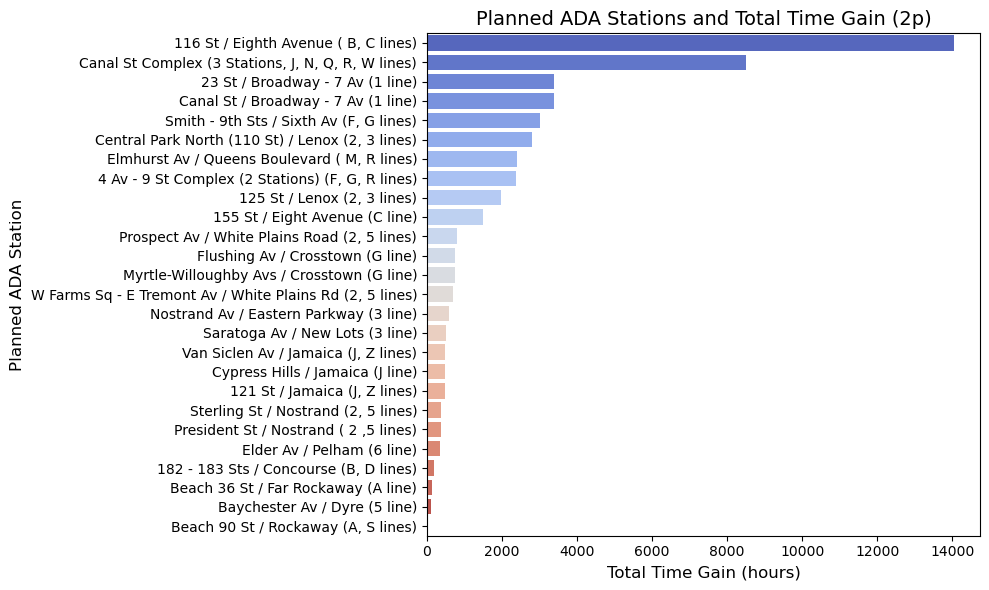

In [17]:
# Set the plot size
plt.figure(figsize=(10, 6))

# Create the barplot using Seaborn
sns.barplot(
    x="total_time_gain_hrs_2p",
    y="planned_ada_station",
    data=df,
    palette="coolwarm",  # Aesthetic color palette
)

# Set plot labels and title
plt.xlabel("Total Time Gain (hours)", fontsize=12)
plt.ylabel("Planned ADA Station", fontsize=12)
plt.title("Planned ADA Stations and Total Time Gain (2p)", fontsize=14)

# Display the plot
plt.tight_layout()
plt.savefig("results.jpg", format="jpg", dpi=500)